In [29]:
#importing Libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset

In [25]:
df = pd.read_csv('/content/emails.csv')

In [45]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [46]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [47]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [48]:
df.isna().sum()

text    0
spam    0
dtype: int64

In [9]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)
    return text

In [11]:
# Apply preprocessing
df['text'] = df['text'].apply(preprocess_text)

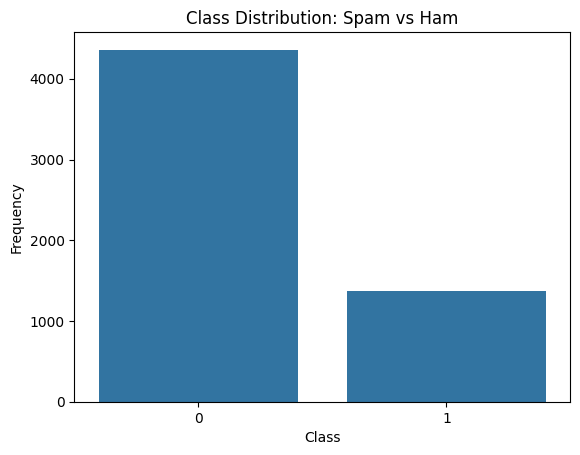

In [28]:
# Plot class distribution
sns.countplot(data=df, x='spam')
plt.title('Class Distribution: Spam vs Ham')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.2, random_state=42)

In [16]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=3000)

In [18]:
# Transform the data
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [19]:
# Initialize and train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [20]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

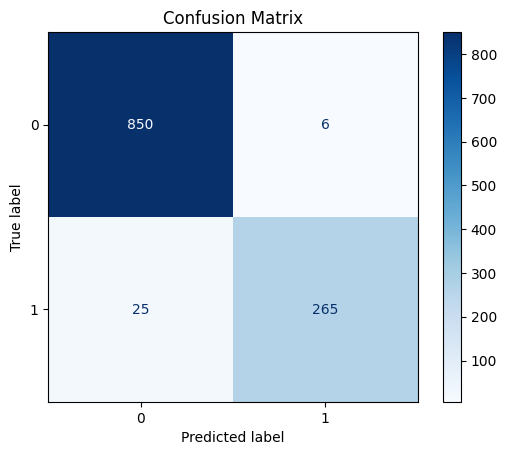

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9729493891797557
[[850   6]
 [ 25 265]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       856
           1       0.98      0.91      0.94       290

    accuracy                           0.97      1146
   macro avg       0.97      0.95      0.96      1146
weighted avg       0.97      0.97      0.97      1146

